## Part 2 a) Decision Tree - oversampling

#### 1. load clean data

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_OverSample_train.csv'
a3train = pd.read_csv(DATAFILE1)
a3train = a3train[[col for col in a3train.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]
a3train.head()

,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,Personal_info2,...,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,-1.244954,0,-0.896869,-3.910702,0,0.793684,-0.475199,0.573928,0,-0.134783,...,0,0,1,0,0,0,1,0.306811,-0.885036,0
1,0.240331,0,-0.179394,0.161749,1,-1.252022,0.954253,1.091226,0,-0.134783,...,0,0,1,0,1,0,0,0.306811,-1.476678,0
2,0.053995,0,-1.255606,0.161749,1,0.793684,1.113080,0.819487,0,-1.175365,...,0,0,0,1,0,0,0,-1.070547,0.594068,0
3,-1.385381,1,1.434923,0.161749,0,0.793684,-0.475199,-1.184536,0,-1.175365,...,0,0,1,0,0,0,1,1.684170,0.889889,0
4,0.053995,0,-0.717500,0.161749,1,0.793684,-1.110510,1.024008,0,0.013872,...,0,0,0,1,0,0,0,0.306811,-1.476678,0


#### 2. parameter optimization `GridSearchCV`

In [2]:
X_train, y_train = a3train.iloc[:,:-1], a3train.iloc[:,-1]

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
est_model = DecisionTreeClassifier()
random_grid = {'criterion': criterion, 
                'min_samples_leaf': min_samples_leaf,
                }

cv_Gird = GridSearchCV(estimator = est_model, param_grid = random_grid, 
                       scoring = make_scorer(f1_score,pos_label=1), cv = 3, verbose = 2)
cv_Gird.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.8s
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.8s
[CV] END .................criterion=gini, min_samples_leaf=1; total time=   0.7s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.8s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.8s
[CV] END .................criterion=gini, min_samples_leaf=2; total time=   0.7s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.9s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.8s
[CV] END .................criterion=gini, min_samples_leaf=3; total time=   0.7s
[CV] END .................criterion=gini, min_samples_leaf=4; total time=   0.8s
[CV] END .................criterion=gini, min_samples_leaf=4; total time=   0.8s
[CV] END .................criterion=gini, min_s

[CV] END .............criterion=entropy, min_samples_leaf=14; total time=   1.0s
[CV] END .............criterion=entropy, min_samples_leaf=15; total time=   0.6s
[CV] END .............criterion=entropy, min_samples_leaf=15; total time=   0.8s
[CV] END .............criterion=entropy, min_samples_leaf=15; total time=   0.9s
[CV] END .............criterion=entropy, min_samples_leaf=16; total time=   0.7s
[CV] END .............criterion=entropy, min_samples_leaf=16; total time=   0.8s
[CV] END .............criterion=entropy, min_samples_leaf=16; total time=   1.2s
[CV] END .............criterion=entropy, min_samples_leaf=17; total time=   0.9s
[CV] END .............criterion=entropy, min_samples_leaf=17; total time=   0.8s
[CV] END .............criterion=entropy, min_samples_leaf=17; total time=   0.8s
[CV] END .............criterion=entropy, min_samples_leaf=18; total time=   0.6s
[CV] END .............criterion=entropy, min_samples_leaf=18; total time=   0.7s
[CV] END .............criter

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=2)

In [8]:
print(cv_Gird.best_params_)
print(cv_Gird.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 10}
0.7938946680308866


#### 3. build classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf= 10)
clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=10)

#### 4. generate `f1-score` for evaluation

In [5]:
# import test set and fit in to classifier
DATAFILE2 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_test.csv'
a3test = pd.read_csv(DATAFILE2)
a3test = a3test[[col for col in a3test.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]

X_test, y_test = a3test.iloc[:,:-1], a3test.iloc[:,-1]
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     12629
           1       0.55      0.50      0.52      3006

    accuracy                           0.82     15635
   macro avg       0.71      0.70      0.71     15635
weighted avg       0.82      0.82      0.82     15635

The F1-score for Quote_Flag = 1 is 0.5200
[[11386  1243]
 [ 1513  1493]]


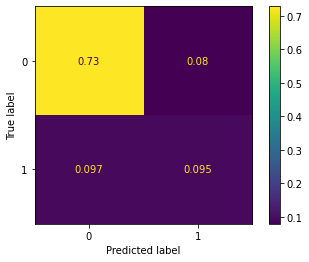

In [11]:
# generate reposrting score

from sklearn.metrics import f1_score, classification_report, confusion_matrix,plot_confusion_matrix
# Classification Report and f1-score
print(classification_report(y_test, y_pred))
print('The F1-score for Quote_Flag = 1 is {:.4f}'.format(f1_score(y_test, y_pred, pos_label=1)))
# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
plot_confusion_matrix(clf, X_test, y_test, normalize = 'all');


### AUC for kaggle
To save time, AUC performance needs to be checked before use to predict for kaggle.
Only AUC > 0.85 worth for kaggle

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
# auc
y_probs_class_1 = y_probs[:,1]
auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc))

The AUC is 0.828


In [29]:
# import the unknown data and fit in the classifier for prediction

DATAFILE3 = 'C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\a3k-clean_m.csv'
a3kaggle = pd.read_csv(DATAFILE3)
a3kaggle1 = a3kaggle[[col for col in a3kaggle.columns if col != 'Unnamed: 0' and col != 'Quote_Id']]

y_pred_K = clf.predict(a3kaggle1)

In [30]:
dummy_list = []
for i in y_pred_K:
    dummy_list = np.append(dummy_list, i)

data = {
    'Quote_Id': a3kaggle['Quote_Id'],
    'Quote_Flag': dummy_list
    }
df = pd.DataFrame(data)

In [31]:
df.head()

,Quote_Id,Quote_Flag
0,1,0.0
1,4,0.0
2,5,0.0
3,7,0.0
4,8,0.0


In [32]:
df.to_csv('C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\UTS_32130_10620084.csv')